In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point, Polygon as ShapelyPolygon
import numpy as np
from scipy.interpolate import splprep, splev
from scipy.spatial import Delaunay
import matplotlib.tri as tri
from numpy import cos, sin, pi

from collections import defaultdict
from IPython.display import display, Math
import sympy as sp

In [2]:
from cluster_algebra.base import *

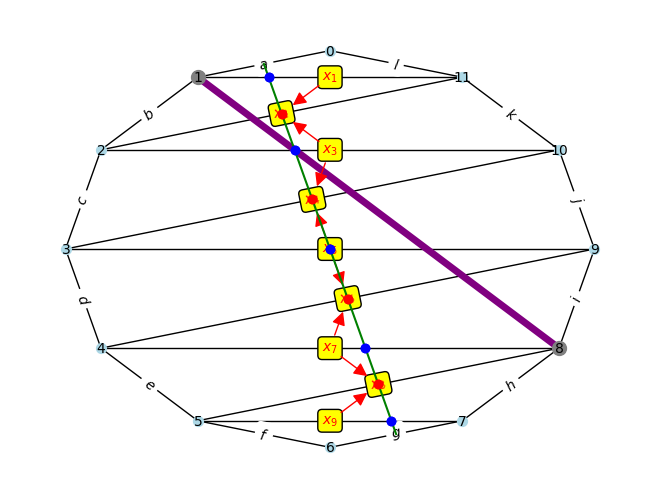

In [3]:
n = 12

vertices = [
    Vertex(cos(2 * pi * i / n + pi / 2), sin(2 * pi * i / n + pi/2), name=str(i)) 
    for i in range(n)
]
frozens = [
    FrozenVariable(vertices[i], vertices[(i + 1) % n], name=chr(ord('a')+i)) 
    for i in range(n)
]
clusters = [
    ClusterVariable(vertices[1], vertices[11], name="1"), 
    ClusterVariable(vertices[11], vertices[2], name="2"), 
    ClusterVariable(vertices[2], vertices[10], name="3"), 
    ClusterVariable(vertices[10], vertices[3], name="4"), 
    ClusterVariable(vertices[3], vertices[9], name="5"), 
    ClusterVariable(vertices[9], vertices[4], name="6"), 
    ClusterVariable(vertices[4], vertices[8], name="7"), 
    ClusterVariable(vertices[8], vertices[5], name="8"), 
    ClusterVariable(vertices[5], vertices[7], name="9"), 
]
lamination = Lamination([
    SingleLamination('a', 'g'), 
], name='')

target = ClusterVariable('1', '8')

q = Quiver(vertices, frozens, clusters, lamination)
# q.plot(target=target)
q.plot(target=target)

In [4]:
q.get_exchange_matrix()

,x_{1},x_{2},x_{3},x_{4},x_{5},x_{6},x_{7},x_{8},x_{9}
x_{1},0,1,0,0,0,0,0,0,0
x_{2},-1,0,-1,0,0,0,0,0,0
x_{3},0,1,0,1,0,0,0,0,0
x_{4},0,0,-1,0,-1,0,0,0,0
x_{5},0,0,0,1,0,1,0,0,0
x_{6},0,0,0,0,-1,0,-1,0,0
x_{7},0,0,0,0,0,1,0,1,0
x_{8},0,0,0,0,0,0,-1,0,-1
x_{9},0,0,0,0,0,0,0,1,0
y,1,-1,1,-1,1,-1,1,-1,1


In [5]:
# # Express all the relations along the series of flips to get the target cluster variable
# for eqn in q.express(target):
#     display(Math(sp.latex(eqn)))
# display(Math(sp.latex(q.express(target)[-1])))

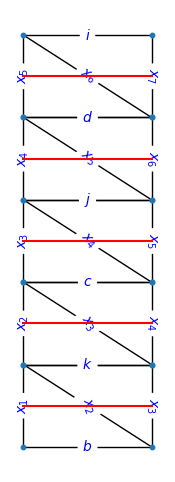

In [6]:
sd = SnakeDiagram(q, target)
sd.plot()

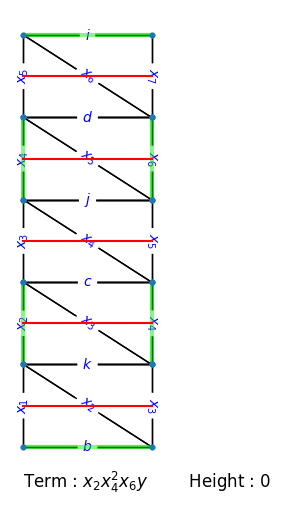

In [7]:
pm = sd.get_min_perfect_matching()
pm.plot()

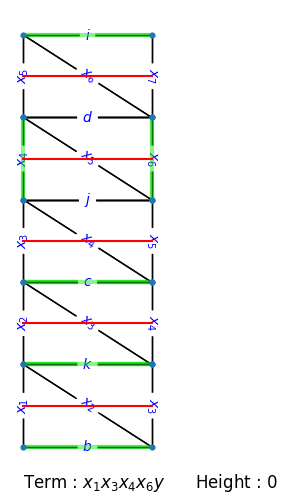

In [8]:
# You can use the flip method with the index of the box you want to flip (starting from 0). 
# Note that you need to flip the box which is flippable (= or ||)
pm.flip(1)
pm.plot()

In [9]:
display(Math(sp.latex(q.express(target)[-1])))

<IPython.core.display.Math object>

In [10]:
poly = q.express(target)[-1].rhs.as_numer_denom()[0]
poly

x_{1}*x_{3}**2*x_{5}**2*x_{7} + x_{1}*x_{3}**2*x_{5}*y + x_{1}*x_{3}*x_{4}*x_{6}*y + x_{1}*x_{3}*x_{5}*x_{7}*y + x_{1}*x_{3}*y**2 + x_{2}*x_{4}**2*x_{6}*y + x_{2}*x_{4}*x_{5}*x_{7}*y + x_{2}*x_{4}*y**2 + x_{3}*x_{5}**2*x_{7}*y + x_{3}*x_{5}*y**2 + x_{4}*x_{6}*y**2 + x_{5}*x_{7}*y**2 + y**3

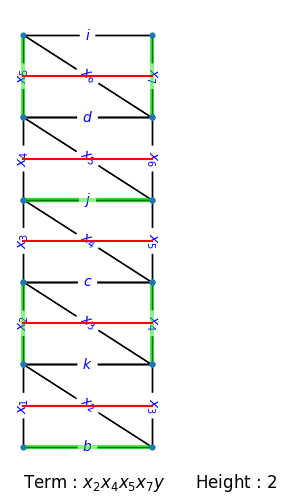

In [11]:
perfect_matchings = sd.get_all_perfect_matchings()
perfect_matchings[5].plot()

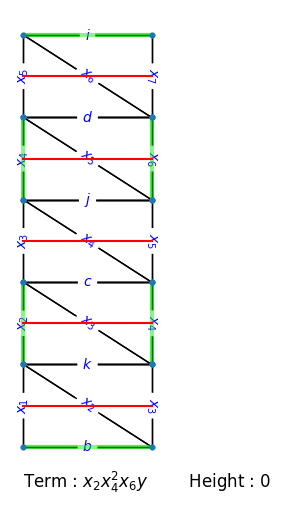

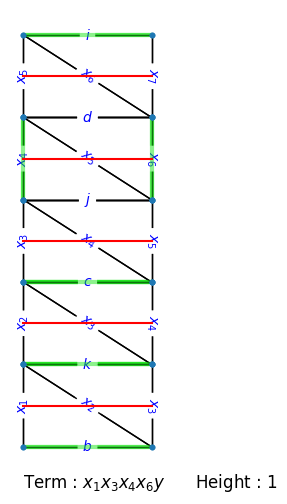

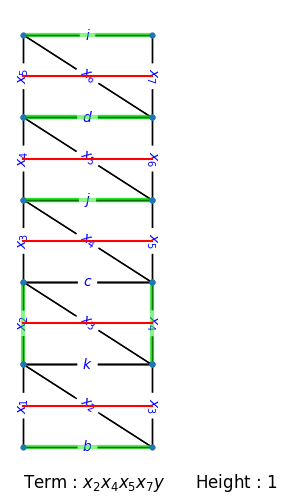

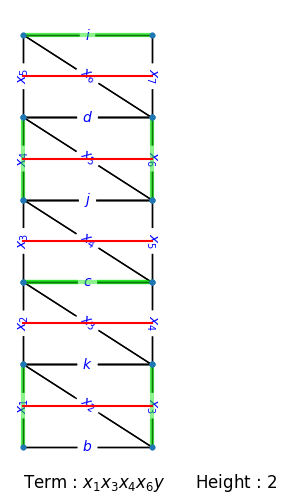

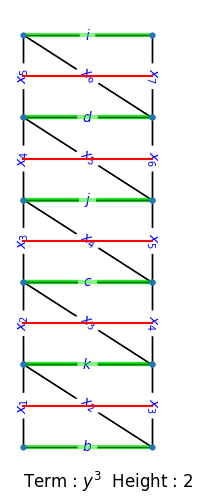

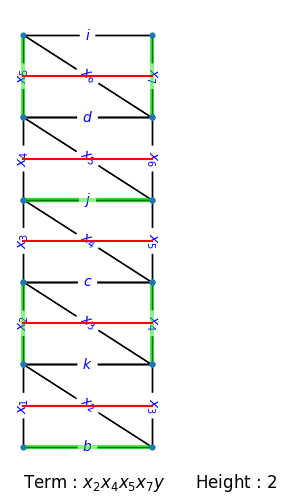

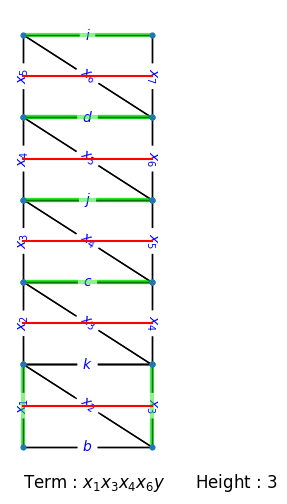

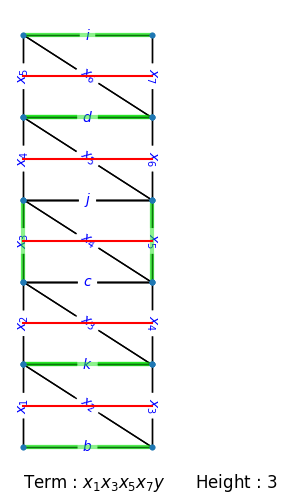

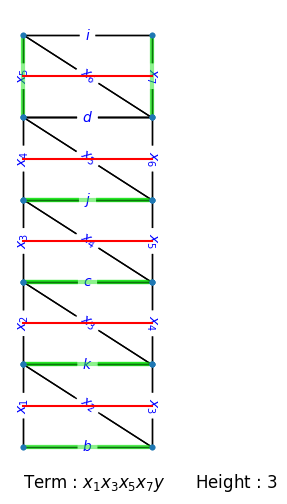

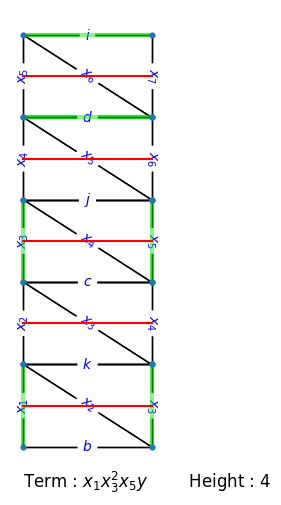

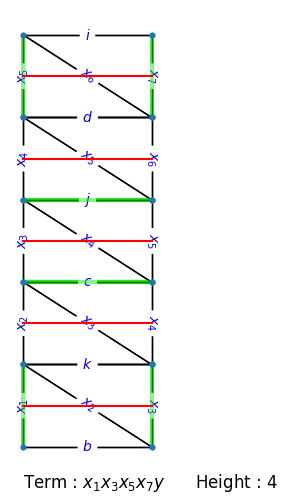

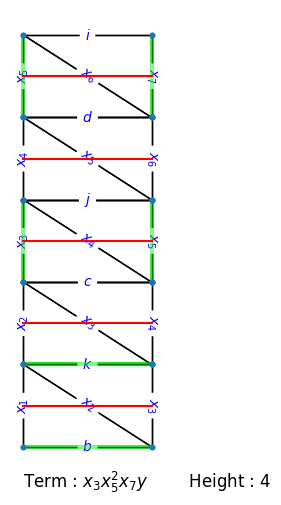

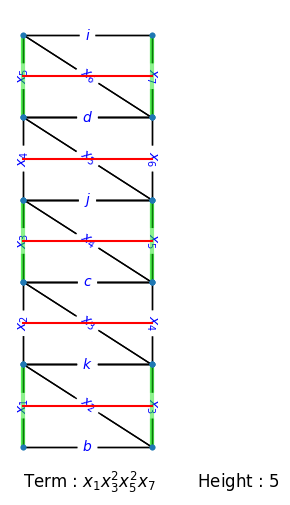

In [13]:
import os

folder_name = "main240618"
os.makedirs(folder_name, exist_ok=True)
for i, pm in enumerate(perfect_matchings):
    pm.save_plot(f"pm_{i+1:d}.png")